# Long Drive Budget Planning 
## Data gathering
Gathering the required data for designing our Destination and Fuel cost table.

For our Sample data we would be considering ``` Maruti Wagon R VXI AT Car  ```.<br>
<img src = "datafiles/wagonr.avif" alt= "Pic of car"  width="500px" height="500px" style="border: 1px solid black; display: block;margin: 0 auto;">
The details would be referring from the below image: 
<img src = "datafiles/Mileage_data.png" alt= "Details of a car"  width="500px" height="500px" style="border: 1px solid black; display: block;margin: 0 auto;">

## Data PreProcessing 
From the above details we obtained
| Details | Output |
|---|---|
| Mileage | 25.9 |
| Fuel type | Petrol |
| Full tank | 32 |
| Total km | 828.8 |

From the <em>internet</em>, The **Avg Price of Diesel** = `Rs.94/L `

## Sample Data 
We would be travelling from $$ A{\rightarrow} B $$
which consist of $x$ km and costs ${\$}y$. So our $$(x,y)$$ would be **distance** and **Fuel cost**.
~~|                |Distance ${_x}$ | Cost ${_y}$ |~~
~~|----------------|---------------- |-------------|~~
~~Delhi-Lonavala   |      1487       |      9280  |~~
~~Pune-lonavala    |       63.8      |      397   |~~
~~Hyd-kakinada     |       489       |      3044  |~~



So this would be our sample data.

 ### Disclamier :  Changing our Sample Data

In [16]:
def fuelCalculator(distance,mileage = 25.9,price = 94):
    return (distance/mileage) * price

In [17]:
#Importing Libraries
import numpy as np 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import glob
import pandas as pd 
import csv
# X_train = np.array([1487,63.8,489,588])
# y_train = np.array([9256,397,3044,3660])
# print(X_train.shape,y_train.shape)
# print(fuelCalculator(1487))

### Importing the data 
The data is imported and loaded using pandas and numpy methods below

In [18]:
#Importing data 
## Importing csv_file and Loading the data to numpy (Vizag.csv)

df_1 = pd.read_csv("datafiles/Vizag.csv")
df_2 = pd.read_csv("datafiles/Vijawada.csv")
df_2

,City,DISTANCE (Kms),City.1,DISTANCE (Kms).1,City.2,DISTANCE (Kms).2
0,Agartala,2928,Guntur,32,Nellore,224.0
1,Agra,1563,Gurgaon,1759,Panaji,873.0
2,Ahmedabad,1475,Guwahati,2290,Paradwip,931.0
3,Aizawl,2554,Gwalior,1372,Pathankot,1830.0
4,Ajmer,1829,Haldia,1232,Patna,1626.0
5,Akola,766,Hasan,740,Pondicherry,593.0
6,Aligarh,1646,Hissar,1862,Porbandar,1869.0
7,Allahabad,1423,Hubli,586,Pune,815.0
8,Ambala,1957,Hyderabad,267,Purulia,1274.0
9,Amritsar,2212,Imphal,2774,Raipur,965.0


Extracting the last column as it contains the values of distance.

In [19]:
# df_1,df_2 = dataframes[0],dataframes[1]
# print(type(df))
# lastCol = df_1.columns[-1]
# X_train,X_test= np.array(df_1[lastCol]),np.array(df_2[lastCol])
# X_train,X_test

def data_processing(dataframe):
    ''' 
    args:
    dataframe : Pandas Dataframe which consist of a csv 
                file in the format of city and distance repeating thrice(city,distance,city,distance,city,distance)
    return:
    arr : A numpy array of Distances after data cleaning
    '''
    even_columns = dataframe.columns[1::2]
    even_columns_array = dataframe[even_columns].to_numpy()
    return even_columns_array 

In [20]:
#Loading the data 
X_train,X_test = data_processing(df_1),data_processing(df_2)
#Get the output from computing the X with the function 
#When np.apply is used, the function computes every element from the numpy array
y_train = np.vectorize(fuelCalculator)(X_train)
X_test.shape

(46, 3)

As you can see there are some **nan** values. Remove them to prevent any abruption.

In [21]:

def check_nan(arr):
## Use the `np.isnan()` function to create a boolean array
# that indicates where NaN values are located
    is_nan = np.isnan(arr)
# Use the `np.where()` function to select all the non-NaN values
# and store them in a new array
    arr = arr[~is_nan]
    return arr 

X_train,X_test,y_train = check_nan(X_train),check_nan(X_test),check_nan(y_train)

## Normalize/Scale the Data

In [22]:
#### This cell has been added at the end as to emphasize the importance of Normalisiing the data ######
#Before Fitting to the model , we need to reshape the data
X_train_shape = X_train.reshape((-1,1))

#Calculating mean and standard deviation for single data points
mean,sigma = np.mean(X_train),np.std(X_train)
#Normalise the data 
scale = StandardScaler()
X_train_norm = scale.fit_transform(X_train_shape)
X_train_norm.shape


(136, 1)

## Apply the gradient Descent 
SGDRegressor is used to apply the gradient descent

In [23]:

#Training our model by fitting to the linear model
gradient_descent = SGDRegressor(max_iter=1000)
gradient_descent.fit(X_train_norm,y_train)

SGDRegressor()

In [24]:
#Extracting weights and bias from gradient Descent 
w_norm = gradient_descent.coef_
b_norm = gradient_descent.intercept_
print(f"The weights and the bias would be w : {w_norm} and b : {b_norm} respectively")

The weights and the bias would be w : [2055.46035559] and b : [5198.74432927] respectively


## Predict the data

In [25]:
#Predicting the data 
y_pred = gradient_descent.predict(X_train_norm)
print(y_pred,y_train,sep="\n")
print(y_pred-y_train)

[9239.8631481  1502.91081025 2315.79886075 6086.29298788 6797.57003207
 4554.86996416 6743.1355644  6924.58378996 1992.82101926 7882.63042092
 5222.59943422 8546.73092646 7697.55323084 3085.13933713 4609.30443182
 3818.19016839 4362.53484506 3538.75990102 6387.49704231 7418.12296348
 8172.94758181 4464.14585138 3876.25360056 4348.01898702 7516.10500529
 2359.34643489 3237.5558466  8441.49095564 8681.00261338 2141.60856422
 3622.22608478 4747.20508325 7526.99189882 4039.55700357 3455.29371727
 5088.3277473  4395.19552566 6547.1714808  3560.53368809 3683.91848147
 8325.36409128 3186.75034344 4798.01058641 8140.28690121 2754.90356661
 3313.76410133 8935.03012916 6630.63766456 6855.63346425 7839.08284678
 4152.05490341 4217.37626462 2972.64143728 7294.7381701  3114.17105322
 4870.58987663 4123.02318733 4449.62999333 7458.04157311 2214.18785444
 7421.75192799 8024.16003685 5941.13440743 4761.72094129  588.41175343
 5200.82564715 1542.82941987 8067.70761099 7287.48024108 8543.10196195
 5418.

In [26]:
#Measuring the accuracy 

mse = mean_squared_error(y_train,y_pred)
print(f"The error that costed would be : {mse:.6f}")

The error that costed would be : 0.046666


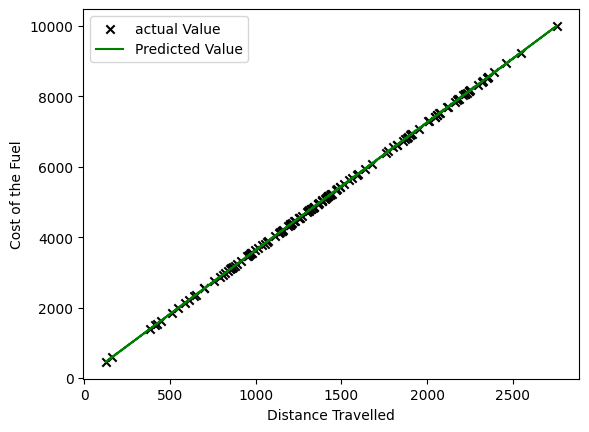

In [27]:
# print(X_train,y_train,y_pred,sep=" ")
plt.scatter(X_train,y_train,marker='x',c='black',label='actual Value')
plt.plot(X_train,y_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

In [28]:
#Predicting for a new value
X_test_new = X_test.reshape((-1,1))
X_test_norm = scale.fit(X_test_new)
# X_test_norm = scale.transform(X_test_new)
# print(X_test_norm[:10])

### Computating Z_Score normalisation instead of scale.transform() for better accuracy #####

X_test_norm = (X_test_new - mean) / sigma
# print(X_test_new)
y_test = np.vectorize(fuelCalculator)(X_test)
y_test_pred = gradient_descent.predict(X_test_norm)
print(X_test[:10],y_test[:10],y_test_pred[:10],sep="\n")
mse_2 = mean_squared_error(y_test,y_test_pred)
print(mse_2)

[2928.   32.  224. 1563. 1759.  873. 1475. 2290.  931. 2554.]
[10626.71814672   116.13899614   812.97297297  5672.66409266
  6384.01544402  3168.41698842  5353.28185328  8311.1969112
  3378.91891892  9269.34362934]
[10626.12759137   116.64636697   813.40755312  5672.5910336
  6383.8680778   3168.60552088  5353.24215662  8310.84823324
  3379.08546253  9268.89486419]
0.05668650697324919


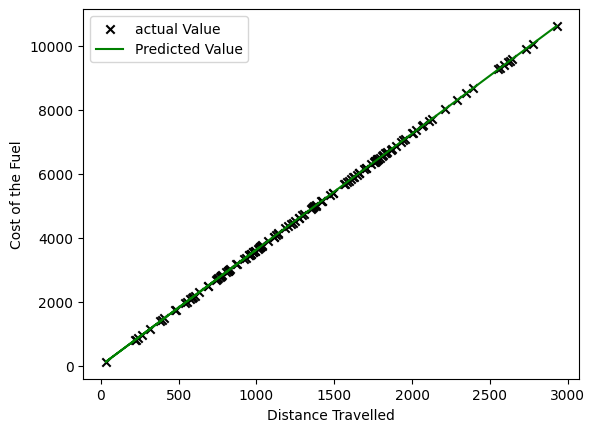

In [29]:
# print(X_test,y_test,y_pred,sep=" ")
plt.scatter(X_test,y_test,marker='x',c='black',label='actual Value')
plt.plot(X_test,y_test_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

In [30]:
# Get the dimensions of the arrays
n1, m1 = X_train_shape.shape
header_columns = ["Distance", "Fuel(Pred)", "Fuel(Actual)"]

# Create a CSV file
file = open("datafiles/output.csv", "w")
writer = csv.writer(file)

# Write the header row
writer.writerow(header_columns)

# Write the arrays to the CSV file
for i in range(n1):
  writer.writerow([X_train[i],y_pred[i],y_train[i]])

# Close the CSV file
file.close()


In [31]:
# Get the dimensions of the arrays
n1, m1 = X_train_shape.shape


# Create a CSV file
file = open("datafiles/output_test.csv", "w")
writer = csv.writer(file)

# Write the header row
writer.writerow(header_columns)

# Write the arrays to the CSV file
for i in range(n1):
  writer.writerow([X_test[i],y_test[i],y_test_pred[i]])

# Close the CSV file
file.close()